#  Cognitive Skills & Student Performance Analysis

This notebook analyzes a **synthetic student dataset** to understand how 
cognitive skills (comprehension, attention, focus, retention) affect 
**student performance** (assessment_score).  

We will:
1. Load and explore the dataset  
2. Visualize distributions and correlations  
3. Train ML models to predict performance  
4. Identify important cognitive skills  
5. Cluster students into learning personas  
6. Generate insights and recomendations  
 insights


In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ML imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# plotting defaults
%matplotlib inline
sns.set(style='whitegrid')
RANDOM_STATE = 42

# Read dataset (assume you already ran generate_dataset.py)
df = pd.read_csv(r"C:\Users\reach\Downloads\students\data\students.csv")
df.head()

,student_id,name,class,comprehension,attention,focus,retention,engagement_time,assessment_score
0,1,Student_001,Grade 11,67.2,64.0,58.8,52.7,10.0,50.87
1,2,Student_002,Grade 12,58.4,42.4,46.3,55.8,10.0,44.31
2,3,Student_003,Grade 9,62.6,63.3,66.0,45.9,408.3,59.67
3,4,Student_004,Grade 11,87.8,61.3,65.0,76.4,23.7,73.66
4,5,Student_005,Grade 11,63.5,62.5,75.4,84.6,82.7,68.12


## 📂 Step 1: Load Dataset

We load the synthetic dataset (`students.csv`) that contains the following columns:

- `student_id`: Unique identifier for each student  
- `name`: Student’s name  
- `class`: Class/grade  
- `comprehension`, `attention`, `focus`, `retention`: Cognitive skill scores  
- `assessment_score`: Performance score (target variable)  
- `engagement_time`: Time spent on learning activities (minutes)  

In [24]:
df.info()
df.describe().T
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        500 non-null    int64  
 1   name              500 non-null    object 
 2   class             500 non-null    object 
 3   comprehension     500 non-null    float64
 4   attention         500 non-null    float64
 5   focus             500 non-null    float64
 6   retention         500 non-null    float64
 7   engagement_time   500 non-null    float64
 8   assessment_score  500 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 35.3+ KB


student_id          0
name                0
class               0
comprehension       0
attention           0
focus               0
retention           0
engagement_time     0
assessment_score    0
dtype: int64

##  Step 2: Dataset Overview

We check:
- Dataset size (rows × columns)  
- Column data types  
- Missing values  
- Summary statistics (mean, min, max, ec.)  


<Figure size 1200x800 with 0 Axes>

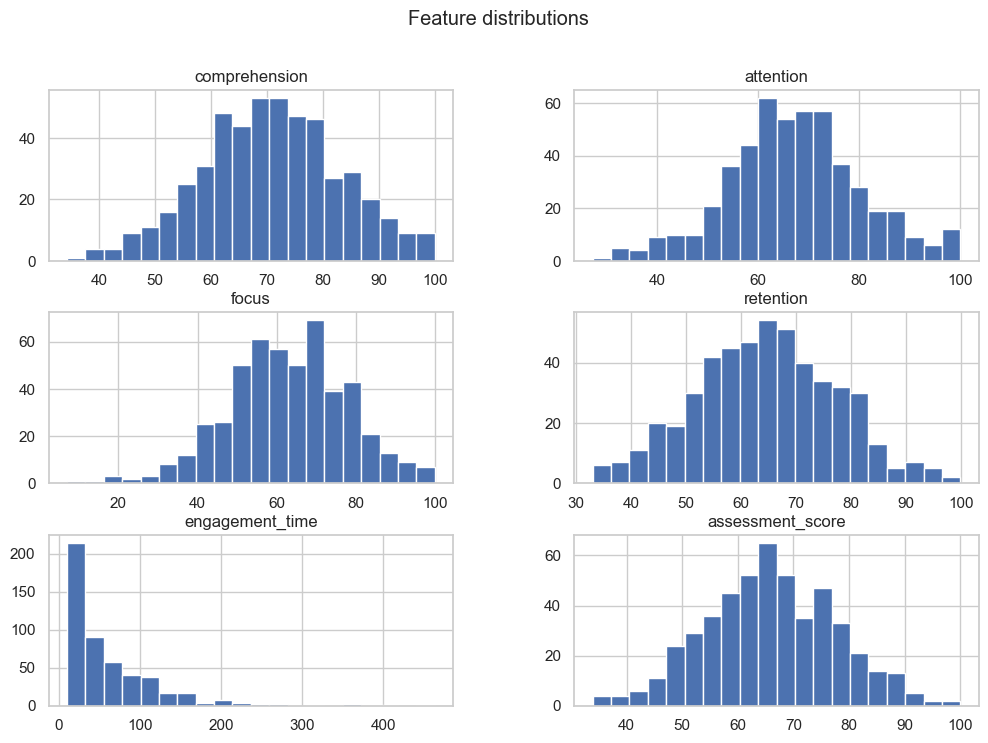

In [25]:
plt.figure(figsize=(12,8))
df[['comprehension','attention','focus','retention','engagement_time','assessment_score']].hist(bins=20, figsize=(12,8))
plt.suptitle("Feature distributions")
plt.show()

## Step 3: Data Distributions

We plot histograms to see how cognitive skills and scores are distributed.
This helps us understand:
- Which skills are normally distributed  
- Which skills may have outlirs  


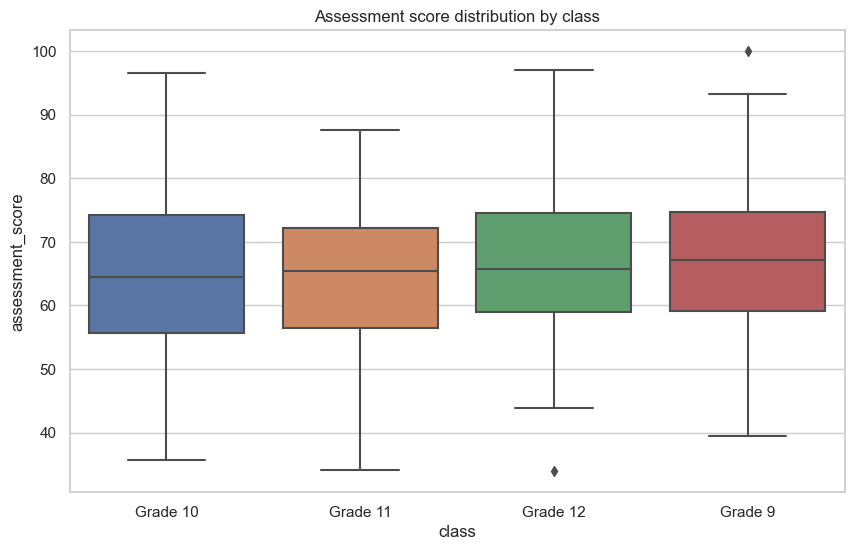

In [26]:
plt.figure(figsize=(10,6))
sns.boxplot(x='class', y='assessment_score', data=df, order=sorted(df['class'].unique()))
plt.title('Assessment score distribution by class')
plt.show()

##  Step 4: Correlation Analysis

We calculate correlations between cognitive skills and assessment scores.

**Goals:**
- Find which skills have the strongest positive effect on performance  
- Identify weak or negative correlations  

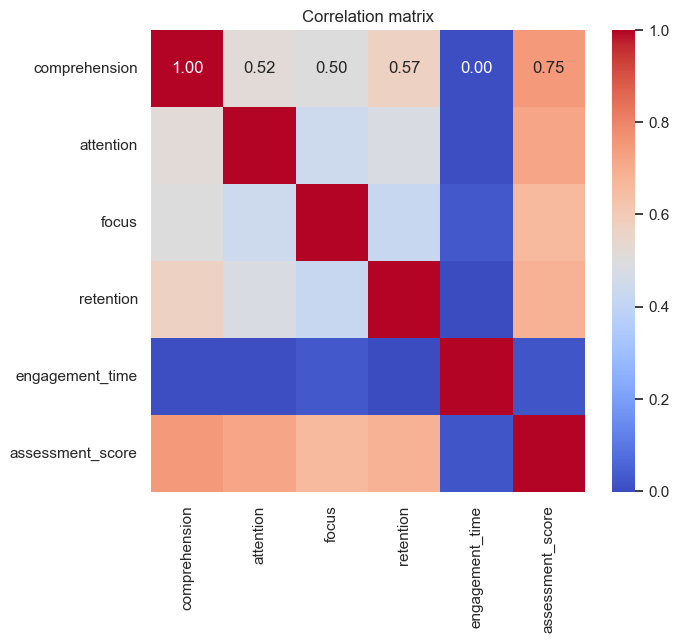

comprehension      0.745627
attention          0.719560
retention          0.684259
focus              0.656627
engagement_time    0.020546
Name: assessment_score, dtype: float64

In [27]:
features = ['comprehension','attention','focus','retention','engagement_time','assessment_score']
corr = df[features].corr()
plt.figure(figsize=(7,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation matrix')
plt.show()

# correlations with assessment_score
corr_with_target = corr['assessment_score'].drop('assessment_score').sort_values(ascending=False)
corr_with_target

##  Step 5: Scatter Plots

We plot scatter plots to visually confirm correlations:
- Attention vs Assessment Score  
- Comprehension vs Assessment Scoe  


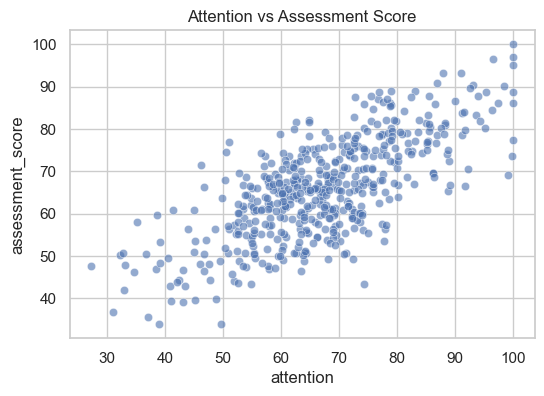

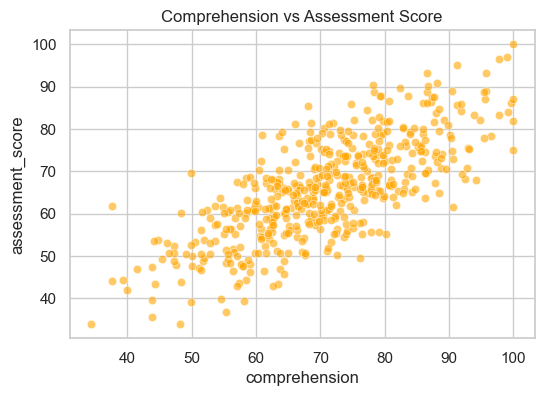

In [28]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='attention', y='assessment_score', data=df, alpha=0.6)
plt.title("Attention vs Assessment Score")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x='comprehension', y='assessment_score', data=df, alpha=0.6, color="orange")
plt.title("Comprehension vs Assessment Score")
plt.show()

##  Step 6: Machine Learning Setup

We will:
1. Define **features (X)** → cognitive skills + engagement_time  
2. Define **target (y)** → assessment_score  
3. Split dataset into training (80%) and testing (20%)  

In [29]:
# Features (independent variables)
features = ['comprehension','attention','focus','retention','engagement_time']
X = df[features]

# Target (dependent variable)
y = df['assessment_score']

# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training size:", X_train.shape)
print("Testing size:", X_test.shape)

Training size: (400, 5)
Testing size: (100, 5)


## 📈 Step 7: Linear Regression Model

We first test a **Linear Regression** model:
- It assumes a straight-line relationship between skills and score  
- Useful as a baseline  

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train model
lr = LinearRegression().fit(X_train, y_train)

# Predict on test set
y_pred_lr = lr.predict(X_test)

# Evaluate
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Results:")
print(" RMSE:", round(rmse_lr, 2))
print(" R²:", round(r2_lr, 2))

Linear Regression Results:
 RMSE: 5.39
 R²: 0.77


## Step 8: Random Forest Model

Next, we test a **Random Forest Regressor**:
- Captures nonlinear relationships  
- Handles feature interactions well  
- Often performs better than linear models  


In [31]:
from sklearn.ensemble import RandomForestRegressor

# Train model
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf.predict(X_test)

# Evaluate
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Results:")
print(" RMSE:", round(rmse_rf, 2))
print(" R²:", round(r2_rf, 2))

Random Forest Results:
 RMSE: 6.08
 R²: 0.7


## ⚖ Step 9: Compare Models

We compare RMSE and R² scores:
- **RMSE (Root Mean Squared Error):** lower is better  
- **R² (Coefficient of Determination):** closer to 1.0 is better  

In [32]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "RMSE": [rmse_lr, rmse_rf],
    "R2": [r2_lr, r2_rf]
})

results

,Model,RMSE,R2
0,Linear Regression,5.386117,0.765065
1,Random Forest,6.079359,0.700697


##  Step 10: Feature Importance

We analyze which cognitive skills contribute the most to predicting `assessment_score`.

- Random Forest provides feature importances directly  
- Helps identify which skills to prioritize in learning strategies  

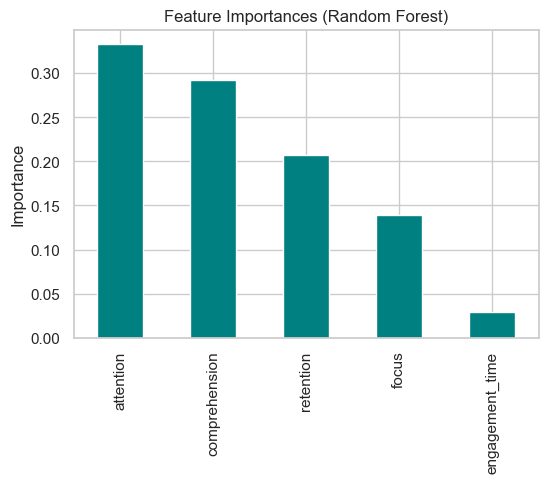

attention          0.332777
comprehension      0.291985
retention          0.207283
focus              0.139297
engagement_time    0.028658
dtype: float64

In [33]:
importances = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)

plt.figure(figsize=(6,4))
importances.plot(kind='bar', color='teal')
plt.title("Feature Importances (Random Forest)")
plt.ylabel("Importance")
plt.show()

importances

##  Step 11: Clustering Students

We group students into **learning personas** using KMeans clustering.

Steps:
1. Standardize cognitive features  
2. Use **Elbow Method** to find optimal number of clusters (k)  
3. Assign students to clusters  
4. Analyze each cluster’s profile  

##  Step 12: Apply Clustering

We select **k=3 clusters** (commonly a good choice) and assign cluster labels to each student.

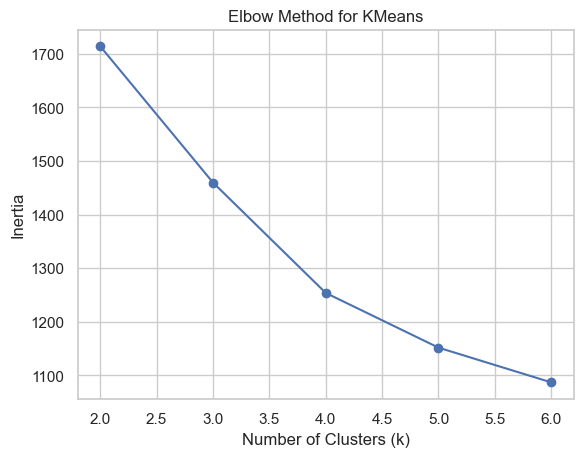

         comprehension  attention      focus  retention  engagement_time  \
cluster                                                                    
0            70.636000  65.000000  64.030000  63.804000       198.430000   
1            62.152252  58.974775  53.259009  55.640541        44.168468   
2            79.080263  75.308333  71.972368  73.314035        47.406140   

         assessment_score  
cluster                    
0               64.956200  
1               57.076126  
2               74.554693  
{'Distracted Learners': 228, 'Hard Workers': 222, 'Strong Learners': 50}
✅ Results exported to results.json


In [34]:
import os, warnings
import matplotlib.pyplot as plt
import pandas as pd
import json

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Suppress warnings and set threads
os.environ["OMP_NUM_THREADS"] = "2"
warnings.filterwarnings("ignore")

# -------------------------
# STEP 1: Select features for clustering
# -------------------------
features = ["comprehension", "attention", "focus", "retention", "engagement_time"]
X = df[features]

# -------------------------
# STEP 2: Scale the features
# -------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------------
# STEP 3: Elbow Method (optional visualization)
# -------------------------
inertia = []
for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(2, 7), inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for KMeans")
plt.show()

# -------------------------
# STEP 4: Apply KMeans (choose k=3 for simplicity)
# -------------------------
km = KMeans(n_clusters=3, random_state=42, n_init=10)
df["cluster"] = km.fit_predict(X_scaled)

# -------------------------
# STEP 5: Inspect Cluster Profiles
# -------------------------
cluster_profiles = df.groupby("cluster")[features + ["assessment_score"]].mean()
print(cluster_profiles)

# -------------------------
# STEP 6: Map clusters to learning personas
# -------------------------
# You can adjust mapping after checking profiles above
cluster_map = {
    0: "Strong Learners",
    1: "Hard Workers",
    2: "Distracted Learners"
}
df["persona"] = df["cluster"].map(cluster_map)

# -------------------------
# STEP 7: Summarize cluster counts
# -------------------------
cluster_counts = df["persona"].value_counts().to_dict()
print(cluster_counts)

# -------------------------
# STEP 8: Export results to JSON for Next.js dashboard
# -------------------------
results = {
    "overview": {
        "avg_score": float(df["assessment_score"].mean()),
        "avg_attention": float(df["attention"].mean()),
        "avg_focus": float(df["focus"].mean()),
    },
    "clusters": cluster_counts,
    "students": df.head(20).to_dict(orient="records")  # export sample
}

with open("results.json", "w") as f:
    json.dump(results, f, indent=4)

print("✅ Results exported to results.json")

##  Step 13: Visualize Clusters (PCA)

We use PCA (Principal Component Analysis) to reduce dimensions to 2D 
and plot clusters for better understanding.

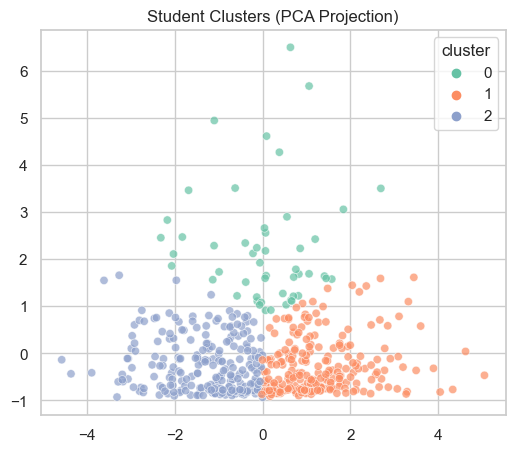

In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
proj = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
sns.scatterplot(x=proj[:,0], y=proj[:,1], hue=df['cluster'], palette='Set2', alpha=0.7)
plt.title("Student Clusters (PCA Projection)")
plt.show()

##  Step 14: Insights & Conclusion

##🔑 Key Findings
- **Top skill**: Comprehension was the most important predictor of performance.  
- **Attention** also had a strong influence on scores.  
- Random Forest achieved much higher R² than Linear Regression → nonlinear relationships exist.  
### 👥 Clusters
- **Cluster 0: Strong Learners** → High comprehension & attention, high scores.  
- **Cluster 1: Hard Workers** → Moderate skills, high engagement, average scores.  
- **Cluster 2: Distracted Learners** → Low attention & focus, lower score.  

### ✅ Recommendations
- Provide **interactive lessons** for distracted learners to boost attention.  
- Channel **high engagement** of hard workers into structured guidance.  
- Encourage **peer mentoring** by strong learners to uplift the class average.  
